<a href="https://colab.research.google.com/github/md-marop-hossain/Ocular-Disease-Recognition-Project-CSE499A/blob/main/Ocular_disease_project_CSE499A_ResNeXt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Setting up local directory to work**
**Stream data direct from kaggle using Kaggle API**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## **Kaggle Eye Diseases Classification Dataset Installation and Download**

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
#create a kaggle folder
! mkdir ~/.kaggle
#copy the kaggle .josn to folder created
! cp kaggle.json ~/.kaggle/
#permission for the json the act
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
! kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification
! unzip eye-diseases-classification

Saving kaggle.json to kaggle.json
ref                                                        title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023               47KB  2023-08-26 11:04:57          28934        873  1.0              
iamsouravbanerjee/customer-shopping-trends-dataset         Customer Shopping Trends Dataset              146KB  2023-10-05 06:45:37           3169         81  1.0              
asaniczka/us-cost-of-living-dataset-3171-counties          US Cost of Living Dataset (1877 Counties)       1MB  2023-10-08 15:47:47            605         30  1.0              
mabelhsu/api-clean-top-1000-youtubers-statistics           Clean Top 1000 Youtube

### **Data Distribution of each class**



| Eye disease          | No. of images |
|:---------------------|:-------------:|
| Cataract             |     1038      |
| Diabetic retinopathy |     1098      |
| Glaucoma             |     1007      |
| Normal               |     1074      |
| ***                  | ***           |
| **Total**            |   **4217**    |

## **Explore images**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'

### **Number of images in dataset:**

In [ ]:
import fnmatch
import os

In [ ]:
# image files count
cataract_count = len(fnmatch.filter(os.listdir('./dataset/cataract'), '*.*'))
dre_count = len(fnmatch.filter(os.listdir('./dataset/diabetic_retinopathy'), '*.*'))
glaucoma_count = len(fnmatch.filter(os.listdir('./dataset/glaucoma'), '*.*'))
normal_count = len(fnmatch.filter(os.listdir('./dataset/normal'), '*.*'))
total_image_count = cataract_count + dre_count + \
                    glaucoma_count + normal_count
# print count
print('---Categories---')
print('Cataract:', cataract_count)
print('Diabetic retinopathy:', dre_count)
print('Glaucoma:', glaucoma_count)
print('Normal', normal_count)
print()
print('---Total image count---')
print(total_image_count)

---Categories---
Cataract: 1038
Diabetic retinopathy: 1098
Glaucoma: 1007
Normal 1074

---Total image count---
4217


### **Image dimensions, properties:**

In [ ]:
from PIL import Image

In [ ]:
# load example image
im = Image.open('./dataset/glaucoma/1495_left.jpg')
# summarize some details about the image
print(im.format)
print(im.mode)
print(im.size) # size already 512 x 512

pixels = np.asarray(im)
print(pixels[0])
print(pixels.shape) # 3 channel last

JPEG
RGB
(512, 512)
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
(512, 512, 3)


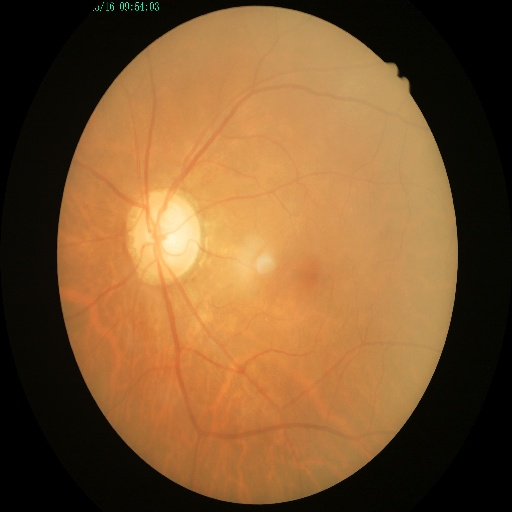

In [ ]:
#Import library
from IPython import display
display.Image(filename='./dataset/glaucoma/1495_left.jpg', width=200, height=150)

In [ ]:
# calculate image pixel mean, min, max

mean = pixels.mean()
print('Mean: %.3f' % mean)
# confirm pixel range is 0-255
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Mean: 86.173
Min: 0.000, Max: 255.000


## **Image hashing**

**To identify any duplicate images**



In [ ]:
import hashlib
import glob

In [ ]:
def img_hash(images, dir): # dir is string of subdirectory
    # https://stackoverflow.com/questions/22058048/hashing-a-file-in-python
    hash_list = [] # list of tuples (filename, hash)
    for image in images:
      with open(image, "rb") as f:
          hash = hashlib.blake2b(f.read()).hexdigest() # extract hash code
          filename = os.path.basename(image) # extract subdirectory and filename
          dir_filename = os.path.join(dir, filename)
          hash_list.append((dir_filename, hash))
          hash_df = pd.DataFrame(hash_list, columns=['filename','hash']) # dataframe of filenames & hashes
    return hash_df

In [ ]:
# hash cataract images
cataract_imgs = glob.glob("./dataset/cataract/*.*")
print(img_hash(images = cataract_imgs, dir='cataract')[:3]) # check format
# assign object to list
cataract_hashdf = img_hash(images = cataract_imgs, dir='cataract')

                    filename  \
0     cataract/1968_left.jpg   
1  cataract/_238_9445598.jpg   
2  cataract/_217_8865645.jpg   

                                                hash  
0  2ca93861c27a9fd3c9ed803e5c0a2655e439ba7fe3497b...  
1  2dcacb5f1f291c70a63c89bd41076fb652726aabc2935f...  
2  17c9b3904f3ad33622cfb8b48c1dd5d3e436ee7e462a84...  


In [ ]:
# hash diabetic retinopathy images
dre_imgs = glob.glob("./dataset/diabetic_retinopathy/*.*")
dre_hashdf = img_hash(images = dre_imgs, dir='dre')

In [ ]:
# hash glaucoma images
glaucoma_imgs = glob.glob("./dataset/glaucoma/*.*")
glaucoma_hashdf = img_hash(images = glaucoma_imgs, dir='glaucoma')

In [ ]:
# hash normal images
normal_imgs = glob.glob("./dataset/normal/*.*")
normal_hashdf = img_hash(images = normal_imgs, dir='normal')

In [ ]:
# join all the hash dataframes together
hash_df = pd.concat([cataract_hashdf, dre_hashdf, glaucoma_hashdf, normal_hashdf], ignore_index=True)
# check hash_list count # should be 4217
len(hash_df)

4217

#### **Search for duplicate hash codes:**

In [ ]:
duplicate_hashes = hash_df[hash_df.duplicated('hash', keep=False)] # based on hash codes only
print("Duplicate images based on hashcodes:")
print(duplicate_hashes) # 2 duplicate hashes.

Duplicate images based on hashcodes:
                     filename  \
292     cataract/625_left.jpg   
1028  cataract/1415_right.jpg   
2411    glaucoma/625_left.jpg   
3126  glaucoma/1415_right.jpg   

                                                   hash  
292   9b41fcbbbdd4a1429f16d915f026d87f7a94f9a77eb3ef...  
1028  a029f6e63fa8919142ac8a4c024caf81db515aa44bf4a7...  
2411  9b41fcbbbdd4a1429f16d915f026d87f7a94f9a77eb3ef...  
3126  a029f6e63fa8919142ac8a4c024caf81db515aa44bf4a7...  


## **Visualise preprocessed images**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__) #2.8.2

2.13.0


**What happens after resizing and rescaling:**

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(160,160) ,  # needs to be symmetrical, specific size for InceptionResNetV2
    layers.Rescaling(1./255) # desired height, width in model pipeline
])

result = resize_and_rescale(pixels)
print(result.shape) # new shape, channels

(160, 160, 3)


**What happens to image pixel values after rescaling:**

In [ ]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


**Show images before and after preprocessing:**

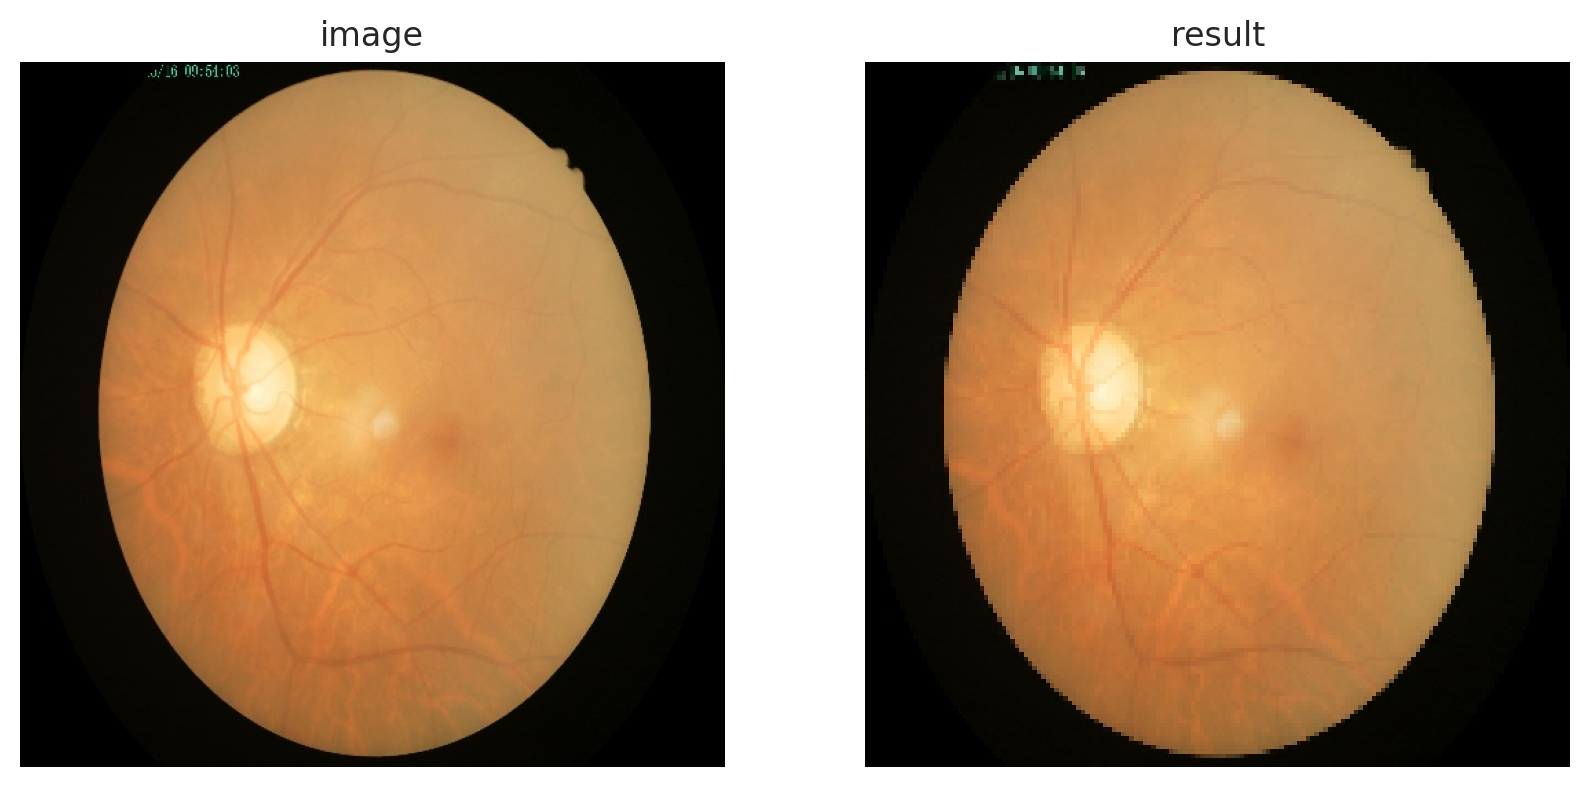

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,8))
ax0.imshow(im)
ax0.axis('off')
ax0.set_title('image')
# after pixel normalisation
ax1.imshow(result)
ax1.axis('off')
ax1.set_title('result')
plt.show() # result seems to have slight blurring of image, but still good definition

## **Create train, validation and test datasets**

In [ ]:
!pip install split-folders

In [ ]:
# first allocate a test set using this library
import splitfolders

splitfolders.ratio('./dataset/', output="./work_directory/", seed=1, ratio=(.5,.25,.25))

In [ ]:
# generate dataset that can be used for machine learning
from tensorflow.keras.utils import image_dataset_from_directory

image_size = (160, 160) # very important to get this right, will determine model success
batch_size = 32

train_ds = image_dataset_from_directory(
    './work_directory/train',
    image_size=image_size,
    shuffle=False,
    labels='inferred',
    seed=1,
    batch_size=batch_size,
    label_mode='categorical'
)

val_ds = image_dataset_from_directory(
    './work_directory/val',
    image_size=image_size,
    shuffle=False,
    labels='inferred',
    seed=1,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = image_dataset_from_directory( # for model evaluation later
    './work_directory/test',
    image_size=image_size,
    labels='inferred',
    seed=1,
    shuffle=False,
    batch_size=batch_size,
    label_mode='categorical'
)

In [ ]:
# preview of how images are labelled
class_names = train_ds.class_names
print(class_names)

### **Visualise images and labels together**

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): # each image 160 x 160
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[tf.argmax(labels[i], axis=0)])
    plt.axis("off")

## **Data augmentation**

In [ ]:
data_augmentation = tf.keras.Sequential(
    [ layers.RandomFlip("horizontal"),
      layers.RandomRotation(0.1),
      layers.RandomContrast(0.1)
    ])

### **Visualise augmented images**

In [ ]:
def augmented_img():
  for image, _ in train_ds.take(1):  # take a sample image from training set
    plt.figure(figsize=(8, 8))
    first_image = image[0]
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
      plt.imshow(augmented_image[0] / 255) # rescale pixel 0 to 1
      plt.axis("off")

In [ ]:
augmented_img()

## **Create Base ResneXt50 model**



In [ ]:
import keras.backend as K # function to add F1 score as metric

def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      f1_score
]

In [ ]:
from tensorflow.keras.layers import (Dense, Activation, Dropout, Conv2D,
                                     MaxPooling2D, BatchNormalization)
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

In [ ]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-ad_nqe4q
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/classification_models.git /tmp/pip-req-build-ad_nqe4q
  Resolved https://github.com/qubvel/classification_models.git to commit a0f006e05485a34ccf871c421279864b0ccd220b
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.8 MB/s eta 0:00:00
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20027 sha256=7f1c01f8cba96e49e246723c5055dc2d835340228b0d9e6081745966737c9883
  Stored in directory: /tmp/pip-ephem-wheel-cache-8shihq21/wheels/f5/13/cb/b1dbd79043c5a389742e422859b0b663adcd7b5c220928c339
Successfully built image-classifiers


In [ ]:
# for keras
from classification_models.keras import Classifiers
# for tensorflow keras
from classification_models.tfkeras import Classifiers
Classifiers.models_names()

['resnet18',
 'resnet34',
 'resnet50',
 'resnet101',
 'resnet152',
 'seresnet18',
 'seresnet34',
 'seresnet50',
 'seresnet101',
 'seresnet152',
 'seresnext50',
 'seresnext101',
 'senet154',
 'resnet50v2',
 'resnet101v2',
 'resnet152v2',
 'resnext50',
 'resnext101',
 'vgg16',
 'vgg19',
 'densenet121',
 'densenet169',
 'densenet201',
 'inceptionresnetv2',
 'inceptionv3',
 'xception',
 'nasnetlarge',
 'nasnetmobile',
 'mobilenet',
 'mobilenetv2']

In [ ]:
import keras
from classification_models.keras import Classifiers
ResNeXt101, preprocess_input = Classifiers.get('resnext101')
base_model = ResNeXt101(input_shape=(160,160,3), weights='imagenet', include_top=False)

173622728/173622728 [==============================] - 3s 0us/step


In [ ]:
# Define a function to create the ResNext-101 model with data augmentation
input_shape=(160,160,3)
def ResNextWithAugmentation():

    inputs = tf.keras.Input(shape=input_shape)
    x = data_augmentation(inputs)

    # Rescale pixel values
    x = tf.keras.layers.Rescaling(1./255)(x)
    x = keras.layers.GlobalAveragePooling2D()(base_model.output)
    # x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)

    # Add custom dense layers
    # x = Dense(256, kernel_regularizer=tf.keras.regularizers.l2(l=0.001),
    #           activity_regularizer=tf.keras.regularizers.l1(0.001),
    #           bias_regularizer=tf.keras.regularizers.l1(0.001),
    #           activation='relu')(x)

    # Add a dropout layer with 50% dropout rate
    # x = Dropout(rate=0.5, seed=123)(x)
    # output = Dense(4, activation='softmax')(x)
    # resnext50_model = tf.keras.Model(inputs=inputs, outputs=output)
    output = keras.layers.Dense(4, activation='softmax')(x)
    model = keras.models.Model(inputs=[base_model.input], outputs=[output])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=METRICS  # Make sure METRICS is defined in your code
    )

    return model
# Create the ResNet-50 base model with regularizers
resnext_model = ResNextWithAugmentation()

## **Compile, fit model, run**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau

In [ ]:
# Train the resnext50 model with data augmentation, doing validation at the end of each epoch.
epochs = 250

resnet_callbacks = [
    ModelCheckpoint("drive/MyDrive/Colab Notebooks/resnext50/resnext50_ep{epoch}_val{val_loss:.3f}", save_best_only=True),
    EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001, restore_best_weights=True),
    CSVLogger('drive/MyDrive/Colab Notebooks/resnext50/resnext50_history.csv'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, mode='min', min_lr=0.00001)
]

# Assuming you have train_ds and val_ds defined, you can train the model as follows:
model = resnext_model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=resnet_callbacks)


Epoch 1/250
66/66 [==============================] - 621s 5s/step - loss: 1.2575 - categorical_accuracy: 0.6376 - precision: 0.6578 - recall: 0.6200 - auc: 0.8100 - f1_score: 0.6313 - val_loss: 4.6822 - val_categorical_accuracy: 0.3184 - val_precision: 0.2943 - val_recall: 0.2557 - val_auc: 0.5309 - val_f1_score: 0.2601 - lr: 1.0000e-04
Epoch 2/250
66/66 [==============================] - 25s 373ms/step - loss: 1.5169 - categorical_accuracy: 0.5640 - precision: 0.6133 - recall: 0.4943 - auc: 0.7336 - f1_score: 0.5133 - val_loss: 5.6324 - val_categorical_accuracy: 0.2548 - val_precision: 0.2548 - val_recall: 0.2548 - val_auc: 0.5095 - val_f1_score: 0.2576 - lr: 1.0000e-04
Epoch 3/250
66/66 [==============================] - 24s 370ms/step - loss: 1.1889 - categorical_accuracy: 0.6399 - precision: 0.6476 - recall: 0.5797 - auc: 0.7951 - f1_score: 0.5906 - val_loss: 179.8027 - val_categorical_accuracy: 0.1844 - val_precision: 0.1844 - val_recall: 0.1844 - val_auc: 0.4494 - val_f1_score: 0

In [ ]:
# Define a function to create the ResNext-101 model with data augmentation
input_shape=(160,160,3)
def ResNextWithAugmentation():

    inputs = tf.keras.Input(shape=input_shape)
    x = data_augmentation(inputs)

    # Rescale pixel values
    x = tf.keras.layers.Rescaling(1./255)(x)
    x = keras.layers.GlobalAveragePooling2D()(base_model.output)
    x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)

    # Add custom dense layers
    x = Dense(256, kernel_regularizer=tf.keras.regularizers.l2(l=0.001),
              activity_regularizer=tf.keras.regularizers.l1(0.001),
              bias_regularizer=tf.keras.regularizers.l1(0.001),
              activation='relu')(x)

    # Add a dropout layer with 50% dropout rate
    x = Dropout(rate=0.5, seed=123)(x)
    # output = Dense(4, activation='softmax')(x)
    # resnext50_model = tf.keras.Model(inputs=inputs, outputs=output)
    output = keras.layers.Dense(4, activation='softmax')(x)
    model = keras.models.Model(inputs=[base_model.input], outputs=[output])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=METRICS  # Make sure METRICS is defined in your code
    )

    return model
# Create the ResNet-50 base model with regularizers
resnext_model = ResNextWithAugmentation()

In [ ]:
# Train the resnext50 model with data augmentation, doing validation at the end of each epoch.
epochs = 250

resnet_callbacks = [
    ModelCheckpoint("drive/MyDrive/Colab Notebooks/resnext50_a/resnext50_ep{epoch}_val{val_loss:.3f}", save_best_only=True),
    EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001, restore_best_weights=True),
    CSVLogger('drive/MyDrive/Colab Notebooks/resnext50_a/resnext50_history.csv'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=5, mode='min', min_lr=0.00001)
]

# Assuming you have train_ds and val_ds defined, you can train the model as follows:
model = resnext_model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=resnet_callbacks)


Epoch 1/250
66/66 [==============================] - 617s 5s/step - loss: 1.6701 - categorical_accuracy: 0.5370 - precision: 0.5533 - recall: 0.5076 - auc: 0.7746 - f1_score: 0.6618 - val_loss: 12.1402 - val_categorical_accuracy: 0.2234 - val_precision: 0.1824 - val_recall: 0.1008 - val_auc: 0.4535 - val_f1_score: 0.1249 - lr: 1.0000e-04
Epoch 2/250
66/66 [==============================] - 297s 5s/step - loss: 2.3847 - categorical_accuracy: 0.5958 - precision: 0.6195 - recall: 0.5446 - auc: 0.7804 - f1_score: 0.5767 - val_loss: 5.3090 - val_categorical_accuracy: 0.2557 - val_precision: 0.2754 - val_recall: 0.2548 - val_auc: 0.5413 - val_f1_score: 0.2576 - lr: 1.0000e-04
Epoch 3/250
66/66 [==============================] - 298s 5s/step - loss: 2.1356 - categorical_accuracy: 0.6039 - precision: 0.6652 - recall: 0.5185 - auc: 0.8070 - f1_score: 0.5556 - val_loss: 2.2216 - val_categorical_accuracy: 0.2348 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4620 - val_f1_score

In [ ]:
import tensorflow as tf

class RandomColorJitter(tf.keras.layers.Layer):

    def __init__(self, brightness_range=0.2, contrast_range=0.2, saturation_range=0.2, hue_range=0.2, **kwargs):
        super(RandomColorJitter, self).__init__(**kwargs)
        self.brightness_range = brightness_range
        self.contrast_range = contrast_range
        self.saturation_range = saturation_range
        self.hue_range = hue_range

    def call(self, inputs):
        # Convert the inputs to [0, 1] float values
        inputs = tf.cast(inputs, tf.float32) / 255.0

        # Apply the color jittering
        inputs = tf.image.random_brightness(inputs, max_delta=self.brightness_range)
        inputs = tf.image.random_contrast(inputs, lower=1.0 - self.contrast_range, upper=1.0 + self.contrast_range)
        inputs = tf.image.random_saturation(inputs, lower=1.0 - self.saturation_range, upper=1.0 + self.saturation_range)
        inputs = tf.image.random_hue(inputs, max_delta=self.hue_range)

        # Convert the outputs back to [0, 255] int values
        inputs = tf.cast(inputs * 255.0, tf.uint8)

        return inputs

In [ ]:
import numpy as np
import tensorflow as tf

# Freeze the ResNet-101 layers
base_model.trainable = False

# Define the data augmentation model
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.1),
    RandomColorJitter(),
    tf.keras.layers.experimental.preprocessing.RandomCrop(160, 160),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])


# Create the custom model
def ResNextWithAugmentation():

    inputs = tf.keras.Input(shape=input_shape)

    # Apply the data augmentation to the input images
    x = data_augmentation(inputs)

    # Rescale pixel values
    x = tf.keras.layers.Rescaling(1./255)(x)
    x = keras.layers.GlobalAveragePooling2D()(base_model.output)
    x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)

    # Add custom dense layers
    x = Dense(256, kernel_regularizer=tf.keras.regularizers.l2(l=0.001),
              activity_regularizer=tf.keras.regularizers.l1(0.001),
              bias_regularizer=tf.keras.regularizers.l1(0.001),
              activation='relu')(x)

    # Add a dropout layer with 50% dropout rate
    x = Dropout(rate=0.5, seed=123)(x)

    # Add the output layer
    output = keras.layers.Dense(4, activation='softmax')(x)
    model = keras.models.Model(inputs=[base_model.input], outputs=[output])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=METRICS  # Make sure METRICS is defined in your code
    )

    return model
resnext_model = ResNextWithAugmentation()

In [ ]:
# Train the resnext50 model with data augmentation, doing validation at the end of each epoch.
epochs = 250

resnet_callbacks = [
    ModelCheckpoint("drive/MyDrive/Colab Notebooks/resnext50_a/resnext50_ep{epoch}_val{val_loss:.3f}", save_best_only=True),
    EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001, restore_best_weights=True),
    CSVLogger('drive/MyDrive/Colab Notebooks/resnext50_a/resnext50_history.csv'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=5, mode='min', min_lr=0.00001)
]

# Assuming you have train_ds and val_ds defined, you can train the model as follows:
model = resnext_model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=resnet_callbacks)

Epoch 1/250
66/66 [==============================] - 233s 3s/step - loss: 2.9170 - categorical_accuracy: 0.2391 - precision: 0.2334 - recall: 0.1703 - auc: 0.4678 - f1_score: 0.1956 - val_loss: 2.2320 - val_categorical_accuracy: 0.2044 - val_precision: 0.1638 - val_recall: 0.0456 - val_auc: 0.4249 - val_f1_score: 0.0718 - lr: 1.0000e-04
Epoch 2/250
66/66 [==============================] - 179s 3s/step - loss: 2.2739 - categorical_accuracy: 0.3406 - precision: 0.3643 - recall: 0.2453 - auc: 0.6015 - f1_score: 0.2924 - val_loss: 1.9681 - val_categorical_accuracy: 0.3127 - val_precision: 0.3401 - val_recall: 0.0798 - val_auc: 0.5792 - val_f1_score: 0.1326 - lr: 1.0000e-04
Epoch 3/250
66/66 [==============================] - 181s 3s/step - loss: 2.0302 - categorical_accuracy: 0.4288 - precision: 0.4598 - recall: 0.3117 - auc: 0.6825 - f1_score: 0.3686 - val_loss: 1.8853 - val_categorical_accuracy: 0.3726 - val_precision: 0.4268 - val_recall: 0.1331 - val_auc: 0.6455 - val_f1_score: 0.2046 

## **Learning Curves**

In [ ]:
history = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/resnext50_a/resnext50_history.csv')
history.head(3)

,epoch,auc,categorical_accuracy,f1_score,loss,precision,recall,val_auc,val_categorical_accuracy,val_f1_score,val_loss,val_precision,val_recall
0,0,0.467836,0.239089,0.195577,2.916969,0.233420,0.170304,0.424926,0.204373,0.071781,2.232014,0.163823,0.045627
1,1,0.601471,0.340607,0.292401,2.273885,0.364341,0.245256,0.579225,0.312738,0.132609,1.968084,0.340081,0.079848
2,2,0.682483,0.428843,0.368606,2.030236,0.459762,0.311670,0.645522,0.372624,0.204607,1.885328,0.426829,0.133080


In [ ]:
acc = history['categorical_accuracy']
val_acc = history['val_categorical_accuracy']

loss = history['loss']
val_loss = history['val_loss']

In [ ]:
def learning_curves(acc,val_acc,loss,val_loss):
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),max(plt.ylim())])
  plt.xlim([0,max(plt.xlim())])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([min(plt.ylim()),max(plt.ylim())])
  plt.xlim([0,max(plt.xlim())])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()
  return plt.show()

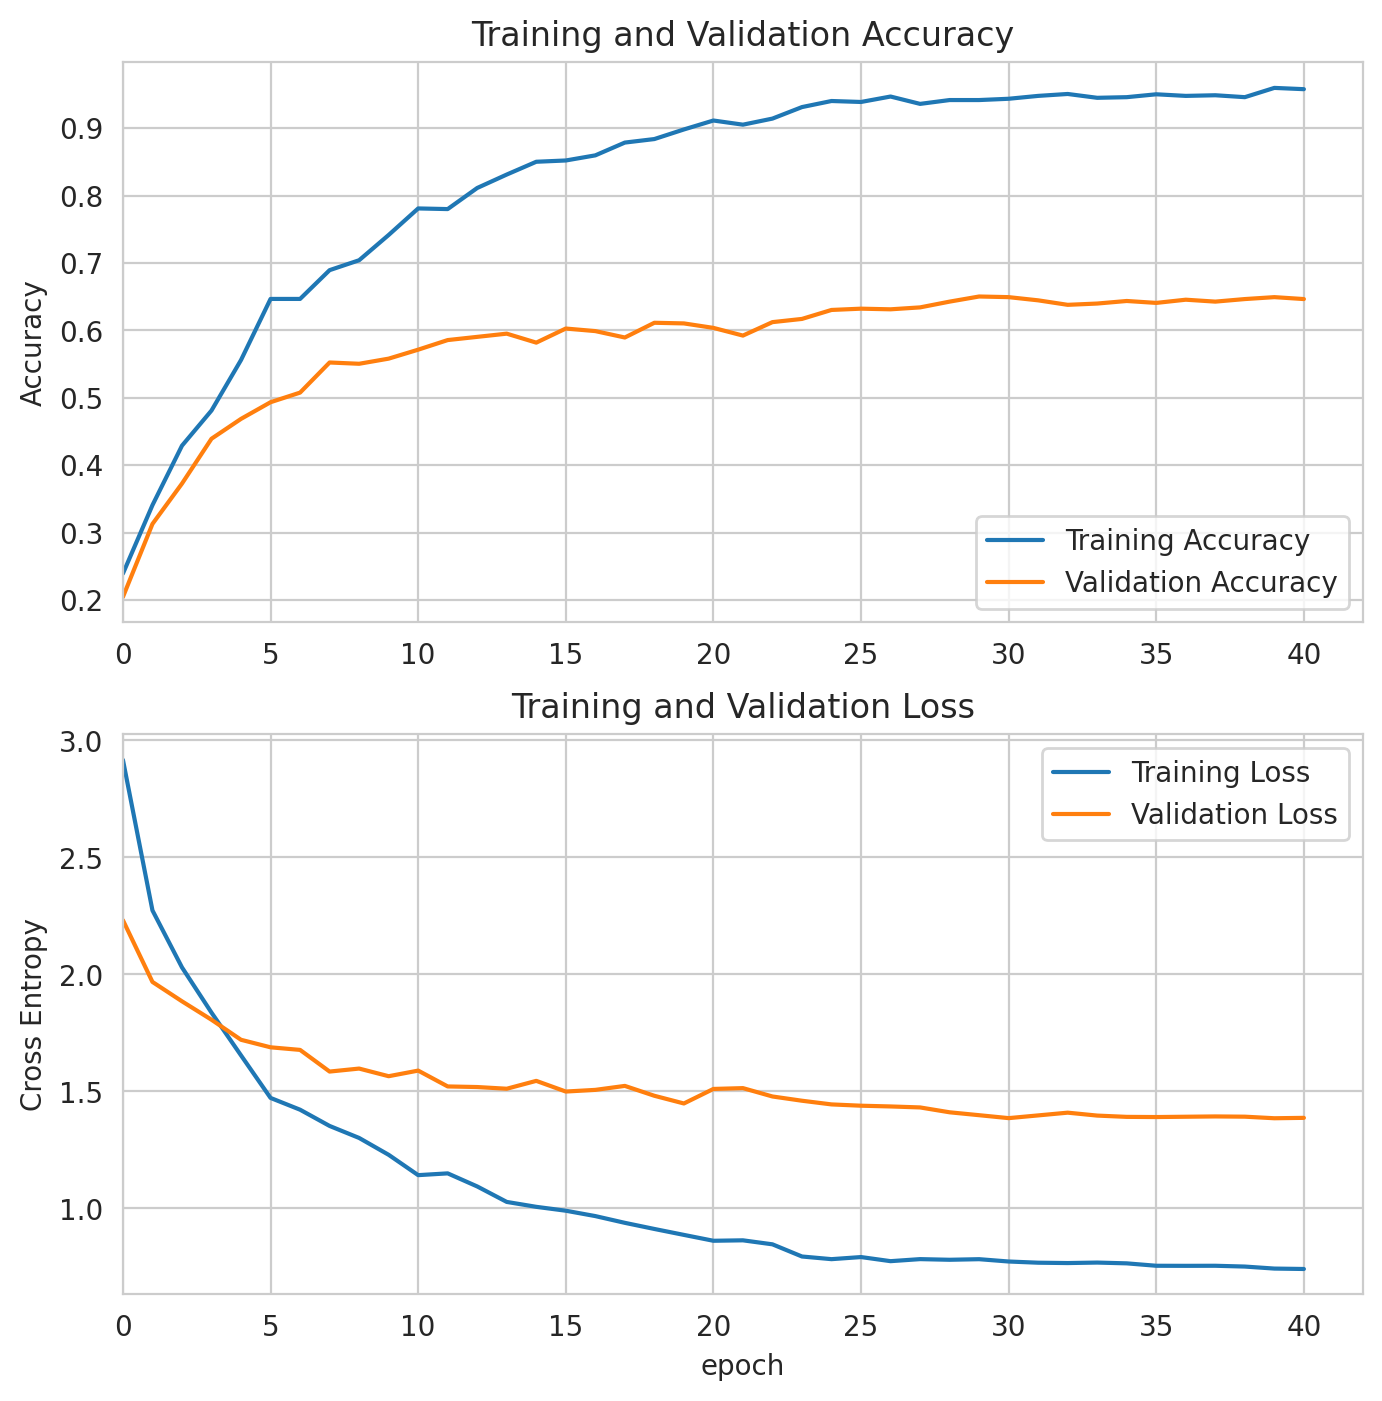

In [ ]:
learning_curves(acc,val_acc,loss,val_loss)

In [ ]:
def metrics(epoch_num):
  val_auc = history.loc[history['epoch']==epoch_num, ['val_auc']].values[0][0]
  auc = history.loc[history['epoch']==epoch_num, ['auc']].values[0][0]
  auc_diff = (auc - val_auc)*100 / auc
  print('AUC percentage difference is:', abs(auc_diff), '%')

  val_acc = history.loc[history['epoch']==epoch_num, ['val_categorical_accuracy']].values[0][0]
  acc = history.loc[history['epoch']==epoch_num, ['categorical_accuracy']].values[0][0]
  acc_diff = (acc - val_acc)*100 / acc
  print()
  print('Accuracy percentage difference is:', abs(acc_diff), '%')

In [ ]:
# check for generalisation using epoch 31
metrics(epoch_num=30)

AUC percentage difference is: 11.111833908376461 %

Accuracy percentage difference is: 31.191706440540703 %


After adding data augmentation layers, the **ResNeXt-50** model is unable to train to a lower validation loss compared to the base model. Generalisation is less than 7%

Validation metrics of the best augmented **ResNeXt-50** model **epoch 31** are as follow:

| Name                |   Scores   |
|:--------------------|:----------:|
|AUC                  |0.9951|
|Categorical Accuracy |0.9435|
|F1 score             |0.9391|
|Loss                 |0.7733|
|Precision            |0.9590|
|Recall               |0.9217|

### **Evaluation**

**Using test dataset and base model**


In [ ]:
# choose model for evaluation
# load model
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/resnext50_a/resnext50_ep31_val1.386",
                                   custom_objects={'f1_score': f1_score})

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/lambda_layer.py:327: UserWarning: classification_models.models._common_blocks is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(


### **Plot confusion matrix for train, validation and test sets**



In [ ]:
# get predictions for confusion matrix
# class_names = train_ds.class_names # from previous cell
print(class_names)

print('===== test_ds predictions =====')
test_preds = model.predict(test_ds, verbose=1) # get test_ds predictions
# sample test_ds predictions
print(test_preds[:1])
for array in test_preds:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

print() #gap

print('===== train_ds predictions =====')
train_preds = model.predict(train_ds, verbose=1) # get train_ds predictions
# sample train_ds predictions
print(train_preds[:1])
for array in train_preds:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

print() #gap

print('===== val_ds predictions =====')
val_preds = model.predict(val_ds, verbose=1) # get val_ds predictions
# sample val_ds predictions
print(val_preds[:1])
for array in val_preds:
  print(f'{class_names[0]} probability is: {array[0]:.4f}')
  print(f'{class_names[1]} probability is: {array[1]:.4f}')
  print(f'{class_names[2]} probability is: {array[2]:.4f}')
  print(f'{class_names[3]} probability is: {array[3]:.4f}')
  break

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
===== test_ds predictions =====
34/34 [==============================] - 24s 163ms/step
[[0.19843298 0.13656718 0.32204834 0.3429515 ]]
cataract probability is: 0.1984
diabetic_retinopathy probability is: 0.1366
glaucoma probability is: 0.3220
normal probability is: 0.3430

===== train_ds predictions =====
66/66 [==============================] - 11s 172ms/step
[[0.67778766 0.00857717 0.09844633 0.2151888 ]]
cataract probability is: 0.6778
diabetic_retinopathy probability is: 0.0086
glaucoma probability is: 0.0984
normal probability is: 0.2152

===== val_ds predictions =====
33/33 [==============================] - 5s 152ms/step
[[0.7974272  0.01809346 0.02451242 0.15996687]]
cataract probability is: 0.7974
diabetic_retinopathy probability is: 0.0181
glaucoma probability is: 0.0245
normal probability is: 0.1600


In [ ]:
y_pred_probs = np.max(test_preds, axis=-1) # store probabilities of predictions for later use

In [ ]:
# convert probabilities into ohe
# for confusion matrix

# for test_ds
idx = np.argmax(test_preds, axis=-1)
test_preds = np.zeros( test_preds.shape )
test_preds[ np.arange(test_preds.shape[0]), idx] = 1

#print(train_preds.argmax(axis=1))
#print(train_labels.argmax(axis=1))

# for train_ds
idx = np.argmax(train_preds, axis=-1)
train_preds = np.zeros( train_preds.shape )
train_preds[ np.arange(train_preds.shape[0]), idx] = 1

# for val_ds
idx = np.argmax(val_preds, axis=-1)
val_preds = np.zeros( val_preds.shape )
val_preds[ np.arange(val_preds.shape[0]), idx] = 1

print('Predicted test_ds labels:', test_preds[:5])
print() # gap
print('Predicted train_ds labels:', train_preds[:5])
print() # gap
print('Predicted val_ds labels:', val_preds[:5])

Predicted test_ds labels: [[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

Predicted train_ds labels: [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

Predicted val_ds labels: [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [ ]:
# extract true labels and images from test_ds
test_labels = np.concatenate([y for x, y in test_ds], axis=0)
test_images = np.concatenate([x for x, y in test_ds], axis=0)

# extract true labels and images from train_ds
train_labels = np.concatenate([y for x, y in train_ds], axis=0)
train_images = np.concatenate([x for x, y in train_ds], axis=0)

# extract true labels and images from val_ds
val_labels = np.concatenate([y for x, y in val_ds], axis=0)
val_images = np.concatenate([x for x, y in val_ds], axis=0)

print('===== Test set true labels =====')
print(test_labels[:5])
print() # gap
print('===== Train set true labels =====')
print(train_labels[:5])
print() # gap
print('===== Validation set true labels =====')
print(val_labels[:5])

===== Test set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

===== Train set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

===== Validation set true labels =====
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix for test_ds predictions
test_cm = confusion_matrix(test_labels.argmax(axis=1), test_preds.argmax(axis=1))
# Creating a confusion matrix for train_ds predictions
train_cm = confusion_matrix(train_labels.argmax(axis=1), train_preds.argmax(axis=1))
# Creating a confusion matrix for val_ds predictions
val_cm = confusion_matrix(val_labels.argmax(axis=1), val_preds.argmax(axis=1))

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
test_cm_df = pd.DataFrame(test_cm,
                          index = class_names,
                          columns = class_names)
train_cm_df = pd.DataFrame(train_cm,
                           index = class_names,
                           columns = class_names)
val_cm_df = pd.DataFrame(val_cm,
                         index = class_names,
                         columns = class_names)

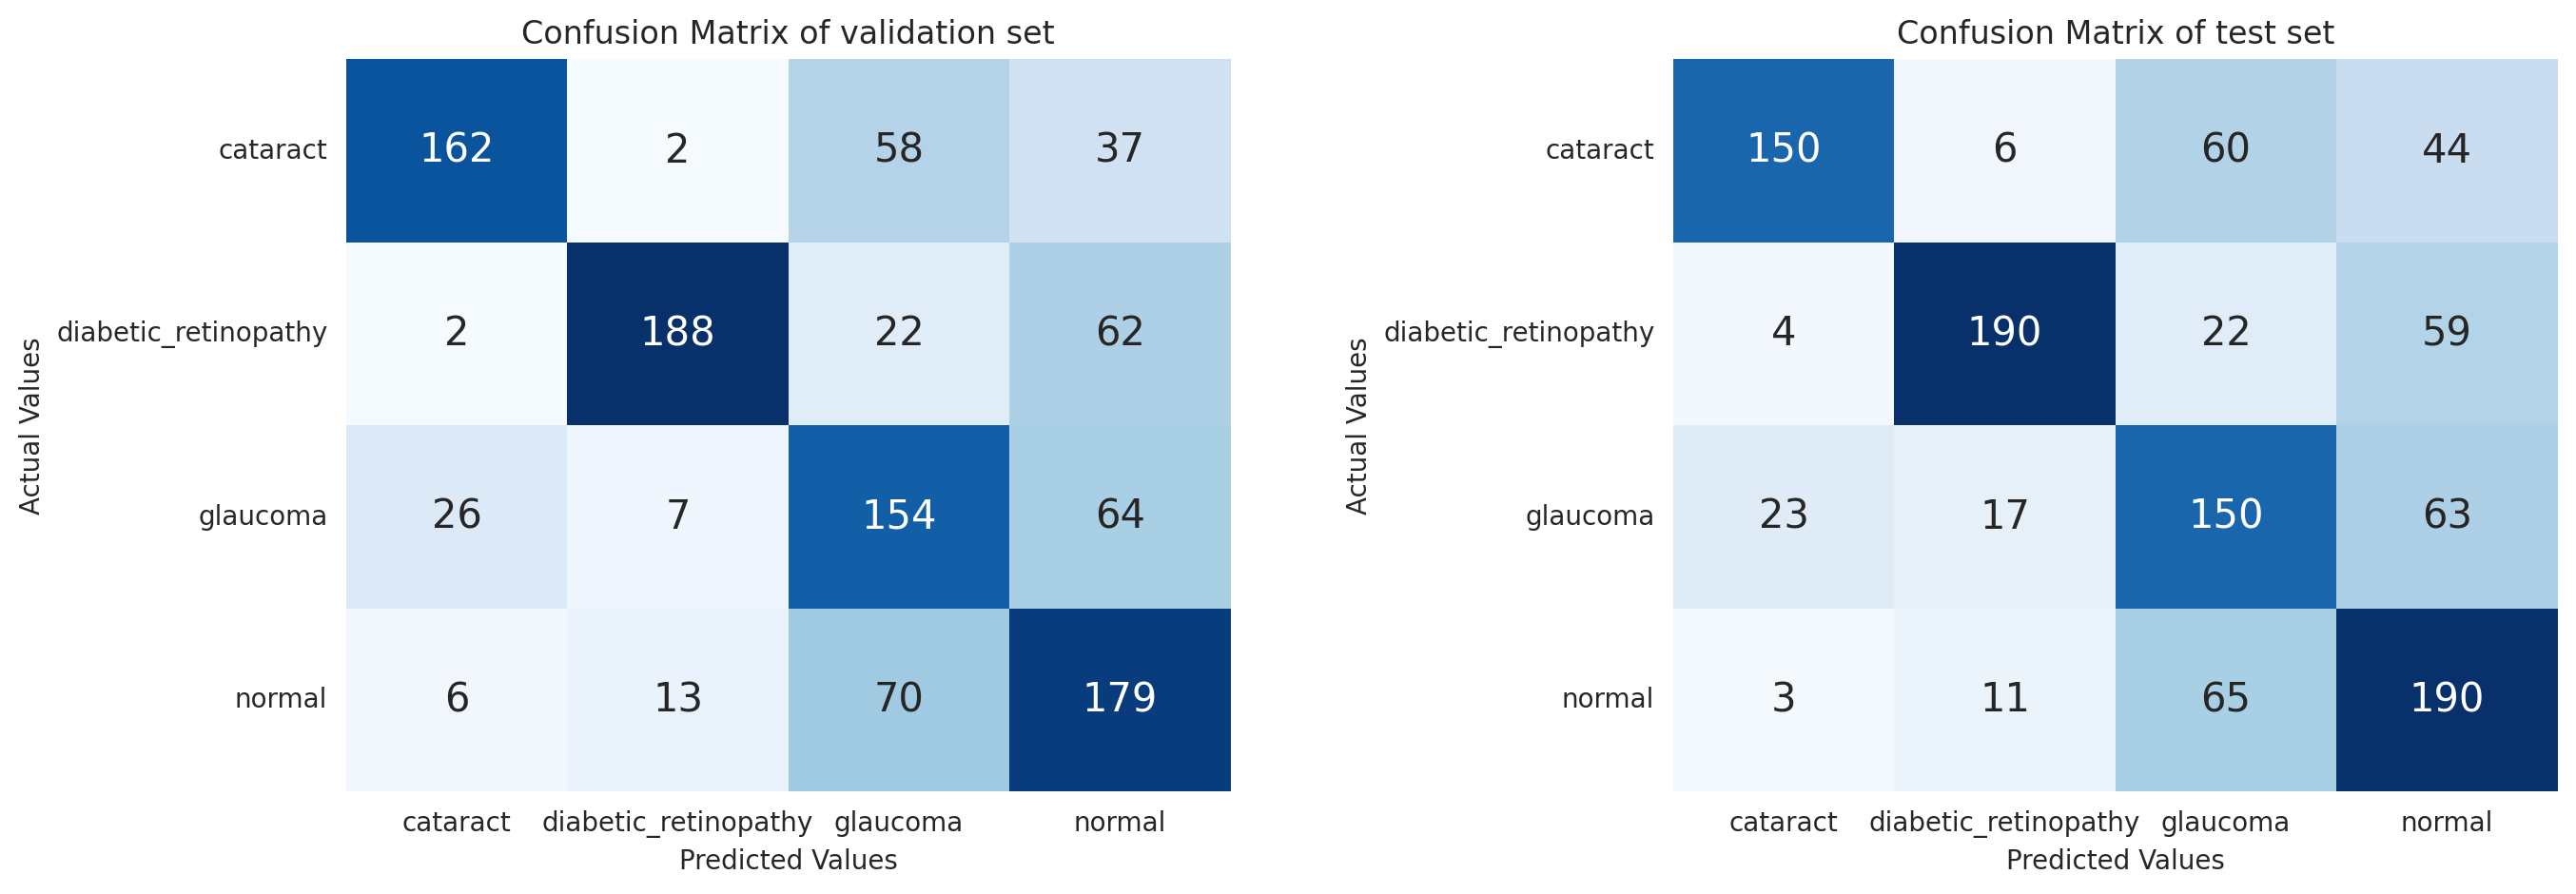

In [ ]:
#Plotting confusion matrix using heatmap
fig, axes = plt.subplots(1, 2, figsize=(15,5))
#sns.heatmap(train_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[0])
#axes[0].set_title('Confusion Matrix of train set')
#axes[0].set_ylabel('Actual Values')
#axes[0].set_xlabel('Predicted Values')

sns.heatmap(val_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[0])
axes[0].set_title('Confusion Matrix of validation set')
axes[0].set_ylabel('Actual Values')
axes[0].set_xlabel('Predicted Values')

sns.heatmap(test_cm_df, annot=True, cbar=False, cmap='Blues', vmin=0, fmt='.3g', annot_kws={"size": 15}, ax=axes[1])
axes[1].set_title('Confusion Matrix of test set')
axes[1].set_ylabel('Actual Values')
axes[1].set_xlabel('Predicted Values')

plt.subplots_adjust(wspace=0.5)

plt.show()

### **Classification report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, test_preds, target_names=class_names, digits= 4))

                      precision    recall  f1-score   support

            cataract     0.8333    0.5769    0.6818       260
diabetic_retinopathy     0.8482    0.6909    0.7615       275
            glaucoma     0.5051    0.5929    0.5455       253
              normal     0.5337    0.7063    0.6080       269

           micro avg     0.6433    0.6433    0.6433      1057
           macro avg     0.6801    0.6418    0.6492      1057
        weighted avg     0.6824    0.6433    0.6511      1057
         samples avg     0.6433    0.6433    0.6433      1057



Model is not great at identifying glaucoma from cataract or normal images. This makes sense since these images can look very similar to retinal images with glaucoma. The model is best at identifying diabetic retinopathy.

### **Misclassified test images**

In [ ]:
# extract test file names from test_ds
test_filenames = test_ds.file_paths

In [ ]:
len(test_filenames)

1057

In [ ]:
class_names

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [ ]:
# convert OHE to class_names for easier comparison
y_true = tf.argmax(test_labels, axis=1).numpy() # tensor object not iterable, use numpy to convert to list
y_pred = tf.argmax(test_preds, axis=1).numpy()
print('First 5 true labels:', y_true[:5])
print('First 5 predictions:', y_pred[:5])

error_list = []

for a, b, c, d in zip(y_true, y_pred, y_pred_probs, test_filenames):
  if a != b:
    error_list.append((class_names[a],class_names[b],c,d))

First 5 true labels: [0 0 0 0 0]
First 5 predictions: [3 1 3 0 2]


In [ ]:
len(error_list)

377

In [ ]:
print('Prediction accuracy on test data:', 100 - (len(error_list)*100/len(test_filenames)), '%')

Prediction accuracy on test data: 64.33301797540207 %


### **Looking into specific images that were misclassified**

In [ ]:
error_list[:5] # check formatting

[('cataract',
  'normal',
  0.3429516,
  './work_directory/test/cataract/103_left.jpg'),
 ('cataract',
  'diabetic_retinopathy',
  0.36143148,
  './work_directory/test/cataract/1084_right.jpg'),
 ('cataract',
  'normal',
  0.47409964,
  './work_directory/test/cataract/1102_left.jpg'),
 ('cataract',
  'glaucoma',
  0.4029952,
  './work_directory/test/cataract/1164_left.jpg'),
 ('cataract',
  'normal',
  0.6865306,
  './work_directory/test/cataract/119_left.jpg')]

In [ ]:
def print_in_color(txt_msg,fore_tupple=(0,255,255),back_tupple=(100,100,100)):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    # default parameter print in cyan foreground and gray background
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m'
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

# example default print
msg='test of default colors'
print_in_color(msg)

test of default colors



In [ ]:
import re

print ('Below is a list of test files that were misclassified \n')
msg='{0:^10}{1:^30s}{2:^20s}{3:^20s}{4:^15s}'.format('No.','Test File','True Label','Predicted as','Probability')
print_in_color(msg)

for i, (a, b, c, d) in enumerate(error_list):
  x = re.split('./work_directory/test/', d)[-1]
  print('{0:^10}{1:^30s}{2:^20s}{3:^20s}  {4:.4f}'.format(i+1,x,a,b,c))

Below is a list of test files that were misclassified 

   No.              Test File                True Label         Predicted as      Probability  

    1         cataract/103_left.jpg           cataract             normal         0.3430
    2        cataract/1084_right.jpg          cataract      diabetic_retinopathy  0.3614
    3         cataract/1102_left.jpg          cataract             normal         0.4741
    4         cataract/1164_left.jpg          cataract            glaucoma        0.4030
    5         cataract/119_left.jpg           cataract             normal         0.6865
    6        cataract/1415_right.jpg          cataract             normal         0.8831
    7         cataract/1435_left.jpg          cataract      diabetic_retinopathy  0.3736
    8        cataract/1454_right.jpg          cataract            glaucoma        0.3733
    9         cataract/1456_left.jpg          cataract             normal         0.4814
    10        cataract/1468_left.jpg          

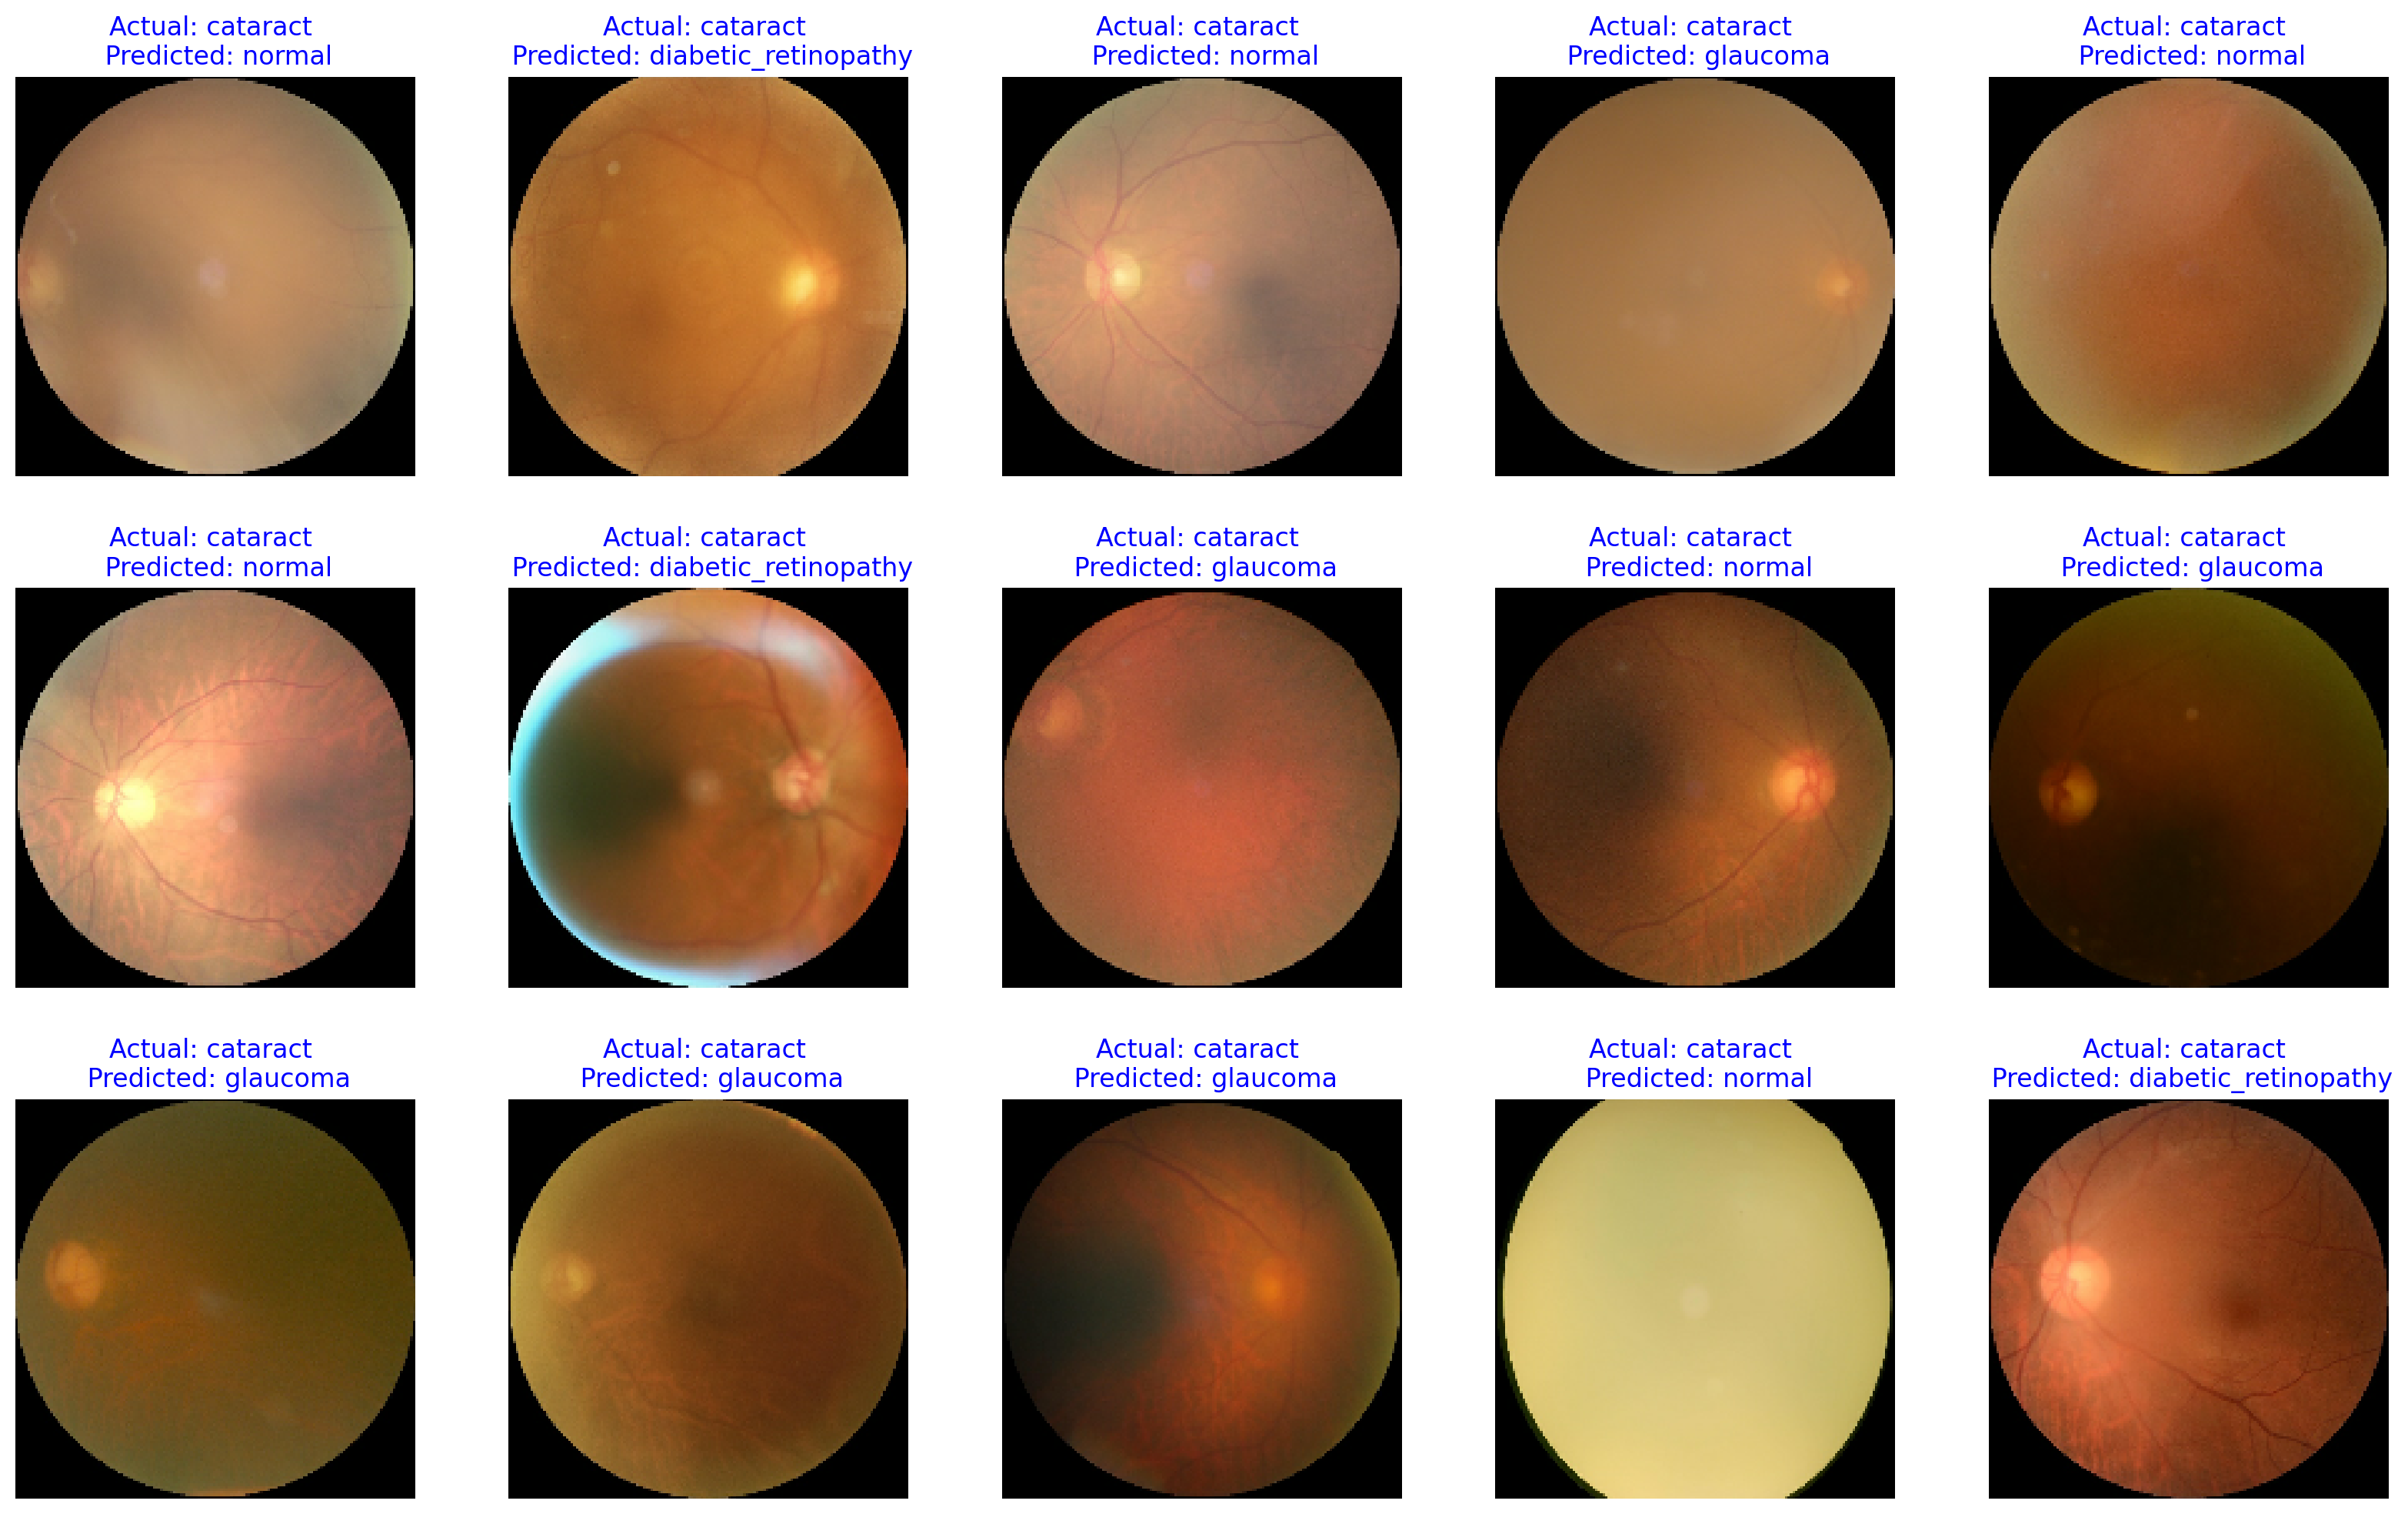

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list called error_list containing (actual, predicted) pairs
# and test_images containing your test images

fig, axes = plt.subplots(3, 5, figsize=(20, 12)) # 3 rows, 5 cols

def axes_img(r, c, i):
    if i < len(error_list):
        axes[r, c].imshow(test_images[i].astype('uint8'))
        axes[r, c].axis('off')
        axes[r, c].set_title(f'Actual: {error_list[i][0]} \n Predicted: {error_list[i][1]}', color='blue')

# Loop through rows and columns to display images
for r in range(3):
    for c in range(5):
        i = r * 5 + c
        axes_img(r, c, i)

plt.subplots_adjust(hspace=0.28) # add space between rows
plt.show()
